Step 1: Preparing data...
Data preparation complete!
Dataset sizes: {'train': 2965, 'val': 845, 'test': 434}
Class names: ['Audi', 'BMW', 'Hyundai Creta', 'Mahindra Scorpio', 'Porsche', 'Rolls Royce', 'Swift', 'Tata Safari', 'Tesla', 'Toyota Innova']
Device being used: cpu

Step 2: Displaying a batch of training data...


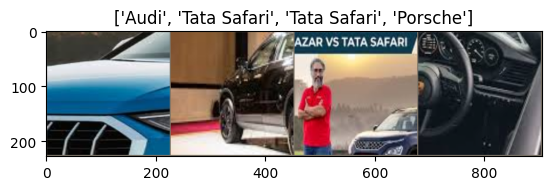

Batch displayed successfully!
Step 3: Loading the resnet18 model...


c:\Users\Pooja\anaconda3\envs\venv_img1\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Model resnet18 loaded successfully.

Step 5: Training the model...
Epoch 0/0
----------


In [ ]:
# Main Notebook - Model comparison and evaluation

# Import functions from separate files
from data_preprocessing import prepare_data
from visualization import display_batch
from model_operations import visualize_model
from evaluation import evaluate_model
from train import train_model  # Import the train_model function
from plotting import plot_losses_accuracies  # Import the new plot function
import pandas as pd  # Import pandas for tabular presentation
from torchvision.models import wide_resnet50_2  # _2 indicates a width multiplier of 2
import torch.optim as optim
from torch.optim import lr_scheduler

# Import necessary libraries
import torch
from torchvision import models
import torch.nn as nn
import os

# Helper function to select a model
def select_model(model_name, device):
    if model_name == 'resnet18':
        model = models.resnet18(weights=True)
        model.fc = nn.Linear(model.fc.in_features, 10)  # Customize for 10 classes
    elif model_name == 'resnet50':
        model = models.resnet50(weights=True)
        model.fc = nn.Linear(model.fc.in_features, 10)  # Customize for 10 classes
    elif model_name == 'wideresnet50':
        model = wide_resnet50_2(pretrained=True)
        model.fc = nn.Linear(model.fc.in_features, 10)  # Customize for 10 classes
    else:
        raise ValueError(f"Model {model_name} not recognized.")
    
    return model.to(device)

# Step 1: Preparing data
print("Step 1: Preparing data...")
# Prepare data
dataloaders, dataset_sizes, class_names, device = prepare_data()
print("Data preparation complete!")
print(f"Dataset sizes: {dataset_sizes}")
print(f"Class names: {class_names}")
print(f"Device being used: {device}")

# Step 2: Displaying a batch of training data
print("\nStep 2: Displaying a batch of training data...")
# Display batch
display_batch(dataloaders['train'], class_names)
print("Batch displayed successfully!")

# Step 3: Choose the model for training
model_name = 'resnet18'  # Change this to 'resnet18', 'resnet50', or 'wideresnet50' to switch models
print(f"Step 3: Loading the {model_name} model...")

# Select model based on user input
model = select_model(model_name, device)
print(f"Model {model_name} loaded successfully.")

# Step 4: Set up loss, optimizer, and scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)  # SGD formula and documentation
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)  # Other schedulers

# Step 5: Train the selected model
print("\nStep 5: Training the model...")
trained_model, train_losses, train_accs, val_losses, val_accs = train_model(model, criterion, optimizer, scheduler, num_epochs=25)
print("Model training complete!")

# Save model weights after training
model_save_path = "trained_model_weights.pth"
torch.save(trained_model.state_dict(), model_save_path)
print(f"Model weights saved to {model_save_path}")

# Step 6: Evaluating the trained model
print("\nStep 6: Evaluating the trained model on the test dataset...")
f1_score, precision_score, accuracy, avg_loss = evaluate_model(trained_model, dataloaders['test'], criterion, device)
print(f"F1 Score: {f1_score:.4f}")
print(f"Precision: {precision_score:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Average Loss: {avg_loss:.4f}")

# Step 7: Presenting a comparison of the models (if multiple models were trained)
# Create a dataframe for comparison
comparison_data = {
    "Model": [model_name],
    "F1 Score": [f1_score],
    "Precision": [precision_score],
    "Accuracy": [accuracy],
    "Average Loss": [avg_loss]
}

# Create pandas DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Display the comparison table
print("\nModel Performance Comparison:")
print(comparison_df)

# Step 8: Visualizing model predictions for the trained model
print("\nStep 8: Visualizing model predictions...")
visualize_model(trained_model, dataloaders, class_names, device)
print("Model predictions visualized successfully!")

# Step 9: Plot losses and accuracies
print("\nStep 9: Plotting Losses and Accuracies...")
plot_losses_accuracies(train_losses, train_accs, val_losses, val_accs)
